In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Using Sklearn to Train Decision Trees

**Using Raw Accelerometer Data**

In [3]:
# Importing data from MakeDataset.py
from MakeDataset import X_train, X_test, y_train, y_test

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [4]:
# Shape of original data from MakeDataset.py
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (126, 500, 3)
X_test shape: (54, 500, 3)
y_train shape: (126,)
y_test shape: (54,)


In [5]:
# Flatten X_train and X_test into 2D data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# New data shape
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_flat shape: (126, 1500)
X_test_flat shape: (54, 1500)
y_train shape: (126,)
y_test shape: (54,)


In [6]:
# Training decision tree using sklearn
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_flat, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
# Getting predictions on test data
y_pred = model.predict(X_test_flat)

In [73]:
# Calculate required metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

Accuracy: 0.61
Precision: 0.56
Recall: 0.61


In [74]:
# Classification Report
cr = classification_report(y_test, y_pred, digits=3)
print(cr)

              precision    recall  f1-score   support

           1      0.250     0.222     0.235         9
           2      0.500     0.556     0.526         9
           3      0.250     0.111     0.154         9
           4      0.667     0.889     0.762         9
           5      0.800     0.889     0.842         9
           6      0.900     1.000     0.947         9

    accuracy                          0.611        54
   macro avg      0.561     0.611     0.578        54
weighted avg      0.561     0.611     0.578        54



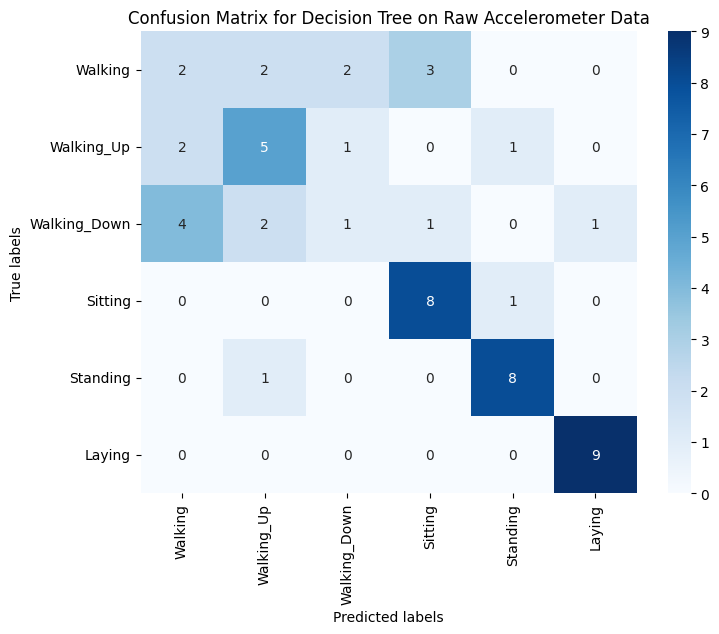

In [47]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"],
            yticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision Tree on Raw Accelerometer Data")
plt.show()

**Using TSFEL Data**

In [7]:
# Import TSFEL
from tsfel import time_series_features_extractor, get_features_by_domain

In [8]:
# Function to get TSFEL features (from HAR Task 1)
def tsfel_features(X, y,feature):
    cfg = get_features_by_domain(feature)
    tsfel_feats = []
    for i in range(len(X)):
        series = pd.DataFrame({"acc_mag": X[i]})
        feat = time_series_features_extractor(cfg, series, verbose=0)
        tsfel_feats.append(feat.values.flatten())
    tsfel_feats = np.array(tsfel_feats)
    return tsfel_feats, y

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Generate TSFEL features for training and testing
feature_type = "all"   # can be "temporal", "spectral", or "all"
X_train_tsfel, y_train_tsfel = tsfel_features(X_train_flat, y_train, feature_type)
X_test_tsfel, y_test_tsfel = tsfel_features(X_test_flat, y_test, feature_type)

In [11]:
print("X_train_tsfel shape:", X_train_tsfel.shape)
print("y_train_tsfel shape:", y_train_tsfel.shape)
print("X_test_tsfel shape:", X_test_tsfel.shape)
print("y_test_tsfel shape:", y_test_tsfel.shape)

X_train_tsfel shape: (126, 162)
y_train_tsfel shape: (126,)
X_test_tsfel shape: (54, 162)
y_test_tsfel shape: (54,)


In [12]:
# Training Decision Tree
model_tsfel = DecisionTreeClassifier(random_state=42)
model_tsfel.fit(X_train_tsfel, y_train_tsfel)

DecisionTreeClassifier(random_state=42)

In [13]:
# Get predictions
y_pred_tsfel = model_tsfel.predict(X_test_tsfel)

In [14]:
# Calculate required metrics
acc_tsfel = accuracy_score(y_test_tsfel, y_pred_tsfel)
prec_tsfel = precision_score(y_test_tsfel, y_pred_tsfel, average="macro")
rec_tsfel = recall_score(y_test_tsfel, y_pred_tsfel, average="macro")

print(f"Accuracy: {acc_tsfel:.2f}")
print(f"Precision: {prec_tsfel:.2f}")
print(f"Recall: {rec_tsfel:.2f}")

Accuracy: 0.87
Precision: 0.89
Recall: 0.87


In [15]:
cr = classification_report(y_test_tsfel, y_pred_tsfel)
print(cr)

              precision    recall  f1-score   support

           1       0.62      0.89      0.73         9
           2       0.71      0.56      0.62         9
           3       1.00      0.78      0.88         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         9

    accuracy                           0.87        54
   macro avg       0.89      0.87      0.87        54
weighted avg       0.89      0.87      0.87        54



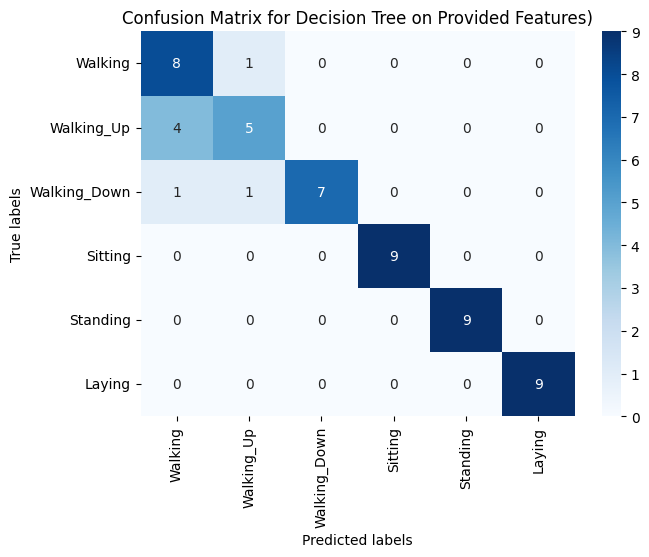

In [16]:
# Confusion matrix
cm = confusion_matrix(y_test_tsfel, y_pred_tsfel)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"],
            yticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision Tree on Provided Features)")
plt.show()

**Using Features Provided in Dataset**

In [61]:
# Get training and test data
X_train_provided = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train_provided = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()

X_test_provided = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test_provided = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None).values.ravel()

# Check shape
print("X_train_provided shape:", X_train_provided.shape)
print("y_train_provided shape:", y_train_provided.shape)
print("X_test_provided shape:", X_test_provided.shape)
print("y_test_provided shape:", y_test_provided.shape)

X_train_provided shape: (7352, 561)
y_train_provided shape: (7352,)
X_test_provided shape: (2947, 561)
y_test_provided shape: (2947,)


In [62]:
# Train decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_provided, y_train_provided)

DecisionTreeClassifier(random_state=42)

In [63]:
# Getting predictions on test data
y_pred_provided = model.predict(X_test_provided)

In [65]:
# Calculate required metrics
acc_provided = accuracy_score(y_test_provided, y_pred_provided)
prec_provided = precision_score(y_test_provided, y_pred_provided, average='macro')
rec_provided = recall_score(y_test_provided, y_pred_provided, average='macro')

print(f"Accuracy: {acc_provided:.2f}")
print(f"Precision: {prec_provided:.2f}")
print(f"Recall: {rec_provided:.2f}")

Accuracy: 0.86
Precision: 0.86
Recall: 0.86


In [66]:
cr = classification_report(y_test_provided, y_pred_provided)
print(cr)

              precision    recall  f1-score   support

           1       0.83      0.92      0.87       496
           2       0.83      0.78      0.80       471
           3       0.89      0.83      0.86       420
           4       0.83      0.76      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



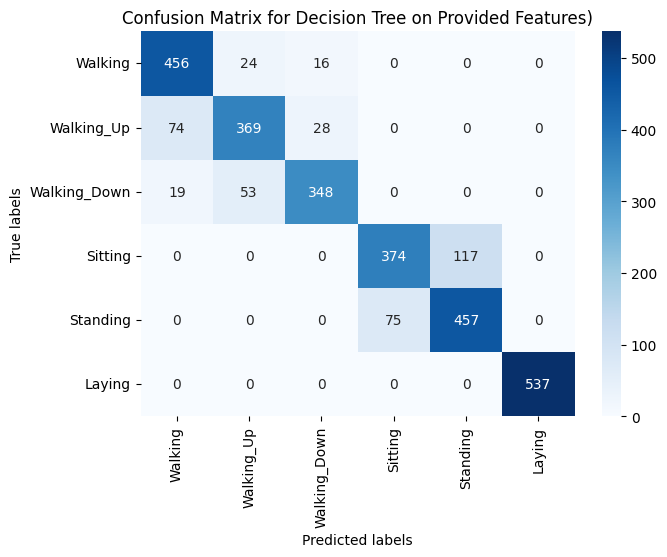

In [67]:
# Confusion matrix
cm = confusion_matrix(y_test_provided, y_pred_provided)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"],
            yticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision Tree on Provided Features)")
plt.show()

Among the three models, the decision tree trained on TSFEL features achieved the best performance on the small accelerometer dataset (accuracy = 87%), outperforming the raw accelerometer model (accuracy = 61%). The model using the provided features also performed strongly (accuracy = 86%) on a much larger dataset. Overall, TSFEL features are the best choice in this context, since they extract meaningful characteristics, making the data more separable for the decision tree.

# Varying the Depths of Decision Trees

**Using Raw Accelerometer Data**

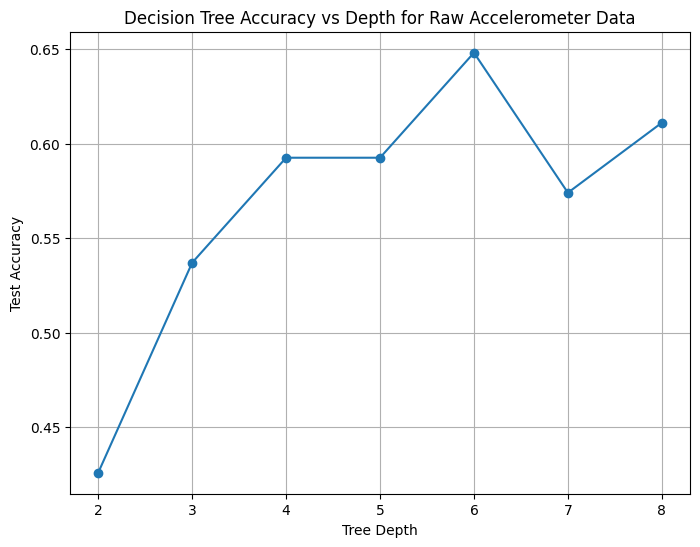

In [43]:
accuracies = []

# Train decision trees for varying depths and record accuracies
for depth in range(2,9):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_flat, y_train)
    y_pred = model.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot test accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(range(2,9), accuracies, marker="o")
plt.title("Decision Tree Accuracy vs Depth for Raw Accelerometer Data")
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

**Using TSFEL Data**

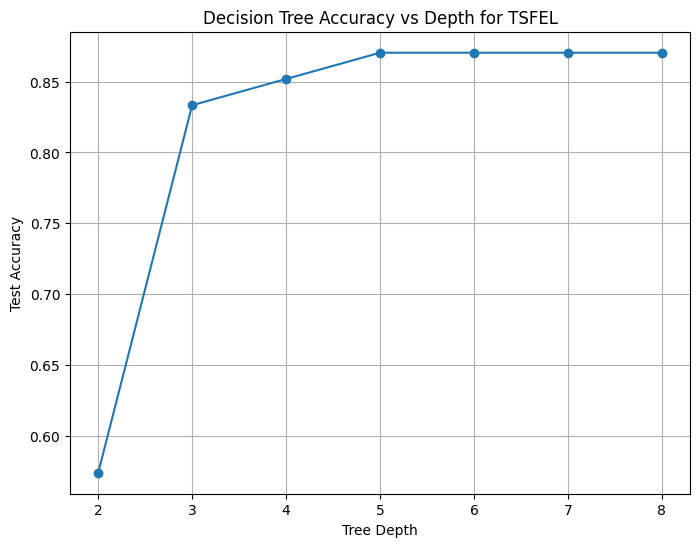

In [19]:
accuracies = []

# Train decision trees for varying depths and record accuracies
for depth in range(2,9):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_tsfel, y_train_tsfel)
    y_pred_t = model.predict(X_test_tsfel)
    acc = accuracy_score(y_test_tsfel, y_pred_t)
    accuracies.append(acc)

# Plot test accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(range(2,9), accuracies, marker="o")
plt.title("Decision Tree Accuracy vs Depth for TSFEL")
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

**Using Features Provided in Dataset**

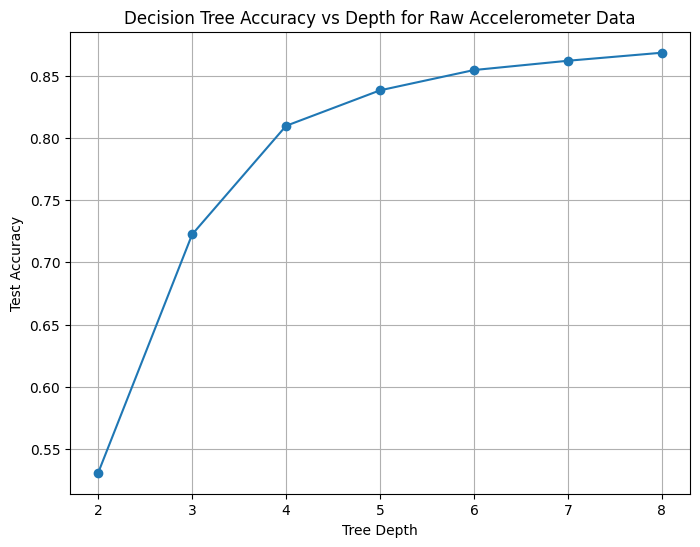

In [44]:
accuracies = []

# Train decision trees for varying depths and record accuracies
for depth in range(2,9):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_provided, y_train_provided)
    y_pred_pr = model.predict(X_test_provided)
    acc = accuracy_score(y_test_provided, y_pred_pr)
    accuracies.append(acc)

# Plot test accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(range(2,9), accuracies, marker="o")
plt.title("Decision Tree Accuracy vs Depth for Raw Accelerometer Data")
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

Yes, the models show lower performance for activities such as walking, walking upstairs, and walking downstairs, which often get confused because their accelerometer patterns are very similar. Similarly, sitting and standing can be misclassified since both are static activities with low acceleration variance. Variations across participants (like different walking speeds or sensor placements for different participants) also contribute to these misclassifications.